# Project: Choosing the "right" $k$
There are two widely used methods to get a good value for $k$.
- The elbow method
- The silhouette coefficient

## The elbow method
- Make a chart over different $k$ values
- If the line chart resembles an arm, then the “elbow” is a good indication of a best fit at that point

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

### Step 2: Generate data

[numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

d0, d1, ..., dn : The dimensions of the returned array, must be non-negative.

In [22]:
data = np.random.randn(400, 2)


# (400, 2)를 (100, 2) 4개로 나누기
data[:100] += 5, 5
data[100:200] += 10, 10
data[200:300] += 10, 5
data[300:] += 5, 10

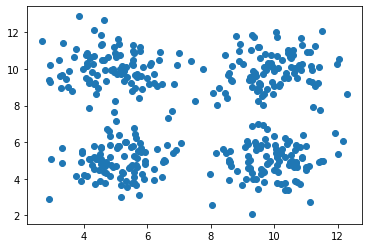

In [23]:
fig, ax = plt.subplots()
ax.scatter(x=data[:, 0], y=data[:, 1])

### Step 3: Different $k$ values
- Create an empty list and assign it to **sse** (sum of squared error)
- Iterate over $k$ from 1 to 10 (both inclusive)
- Create a model **KMeans(n_cluster=k)**
- Fit the model with **data**
- Append the **model.inertia_** to the list **sse**

In [25]:
sse = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(data) # unspervised
    sse.append(model.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [26]:
sse

[5640.172544908248,
 3135.1408843549457,
 1864.4465794834682,
 709.0116897219402,
 629.7757503082336,
 561.423789637509,
 500.0135496252475,
 436.1924255826908,
 402.8066659292965,
 361.70913509486707]

### Step 4: Create plot
- Create a figure and axes (**fig, ax**) from Matplotlib.pyplot (**plt**)
- Make a plot over **range(1, 11)** and **sse**

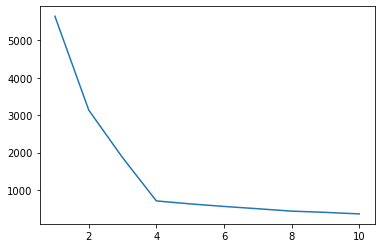

In [30]:
fig, ax = plt.subplots()
ax.plot(range(1, 11), sse)
# arm에서 elbow가 4쯤에 있다:
# 이 모델에서는 clustering with 4 clusters is ideal하다는 의미

## The silhouette coefficient
- a measure of cluster cohesion and separation. 
- It quantifies how well a data point fits into its assigned cluster based on two factors:


- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

### Step 1: Import libraries

In [31]:
from sklearn.metrics import silhouette_score

### Step 2: Calculate Silouette Coefficients
- Create an empty list and assign it **silouette_coefficients**
- Iterate $k$ over 2 to 10 (both inclusive)
    - Create **KMeans** model with **n_clusters=k**
    - Fit the model with **data**
    - Calculate the silhouette score on **data** and **model.labels_** and append it to list **silouette_coefficients**

In [36]:
silhouette_coefficients = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    silhouette_coefficients.append(score)

In [38]:
silhouette_coefficients

[0.4400878648547084,
 0.4887680106561524,
 0.6247267102608628,
 0.5428492675197002,
 0.47857182488013966,
 0.4087747888068653,
 0.35004278460954064,
 0.3478004303812719,
 0.3598696750611788]

### Step 3: Plot the result
- Create a figure and axes (**fig, ax**) from Matplotlib.pyplot (**plt**)
- Make a plot over **range(2, 11)** and **silhouette_coefficients**

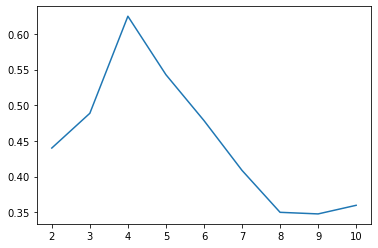

In [39]:
fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_coefficients)
# 가장 큰 값이 4에 있다:
# 4 is the best value of the coefficients.